In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from matplotlib import pyplot as plt
%matplotlib inline

font = 'Arial'
plt.rcParams['font.family'] = font
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = font
plt.rcParams['mathtext.bf'] = font
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.width'] = 0.5

In [2]:
rad_re3_df = pd.read_csv('rad_re3.csv')
dreamer_re3_df = pd.read_csv('dreamer_re3.csv')

In [3]:
envs = sorted([
    'acrobot_swingup',
    'hopper_stand',
    'reacher_hard',
    'finger_spin',
    'cartpole_swingup',
    'cartpole_balance',
    'ball_in_cup_catch',
    'walker_run',
    'walker_walk',
    'cheetah_run_sparse',
    'walker_run_sparse',
    'quadruped_run',
    'hopper_hop',
    'cartpole_swingup_sparse',
    'pendulum_swingup'
])

env_names = dict()
for env in envs:
    p = [x.capitalize() for x in env.split('_')]
    env_names[env] = ' '.join(p)

In [4]:
from collections import defaultdict
cutoff = defaultdict(lambda: 500)

ylims = defaultdict(lambda: (-20, 1000))
ylims['cartpole_swingup_sparse'] = (-20, 1000)
ylims['cheetah_run_sparse'] = (-14, 700)
ylims['hopper_hop'] = (-7, 350)
ylims['hopper_stand'] = (-20, 1000)
ylims['pendulum_swingup'] = (-20, 1000)
ylims['walker_run_sparse'] = (-11, 550)
ylims['walker_walk_sparse'] = (-20, 1000)
ylims['quadruped_run'] = (-10, 500)
ylims['acrobot_swingup'] = (-4, 200)
ylims['walker_run'] = (-12, 600)

# Main Results with 5 Seeds

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


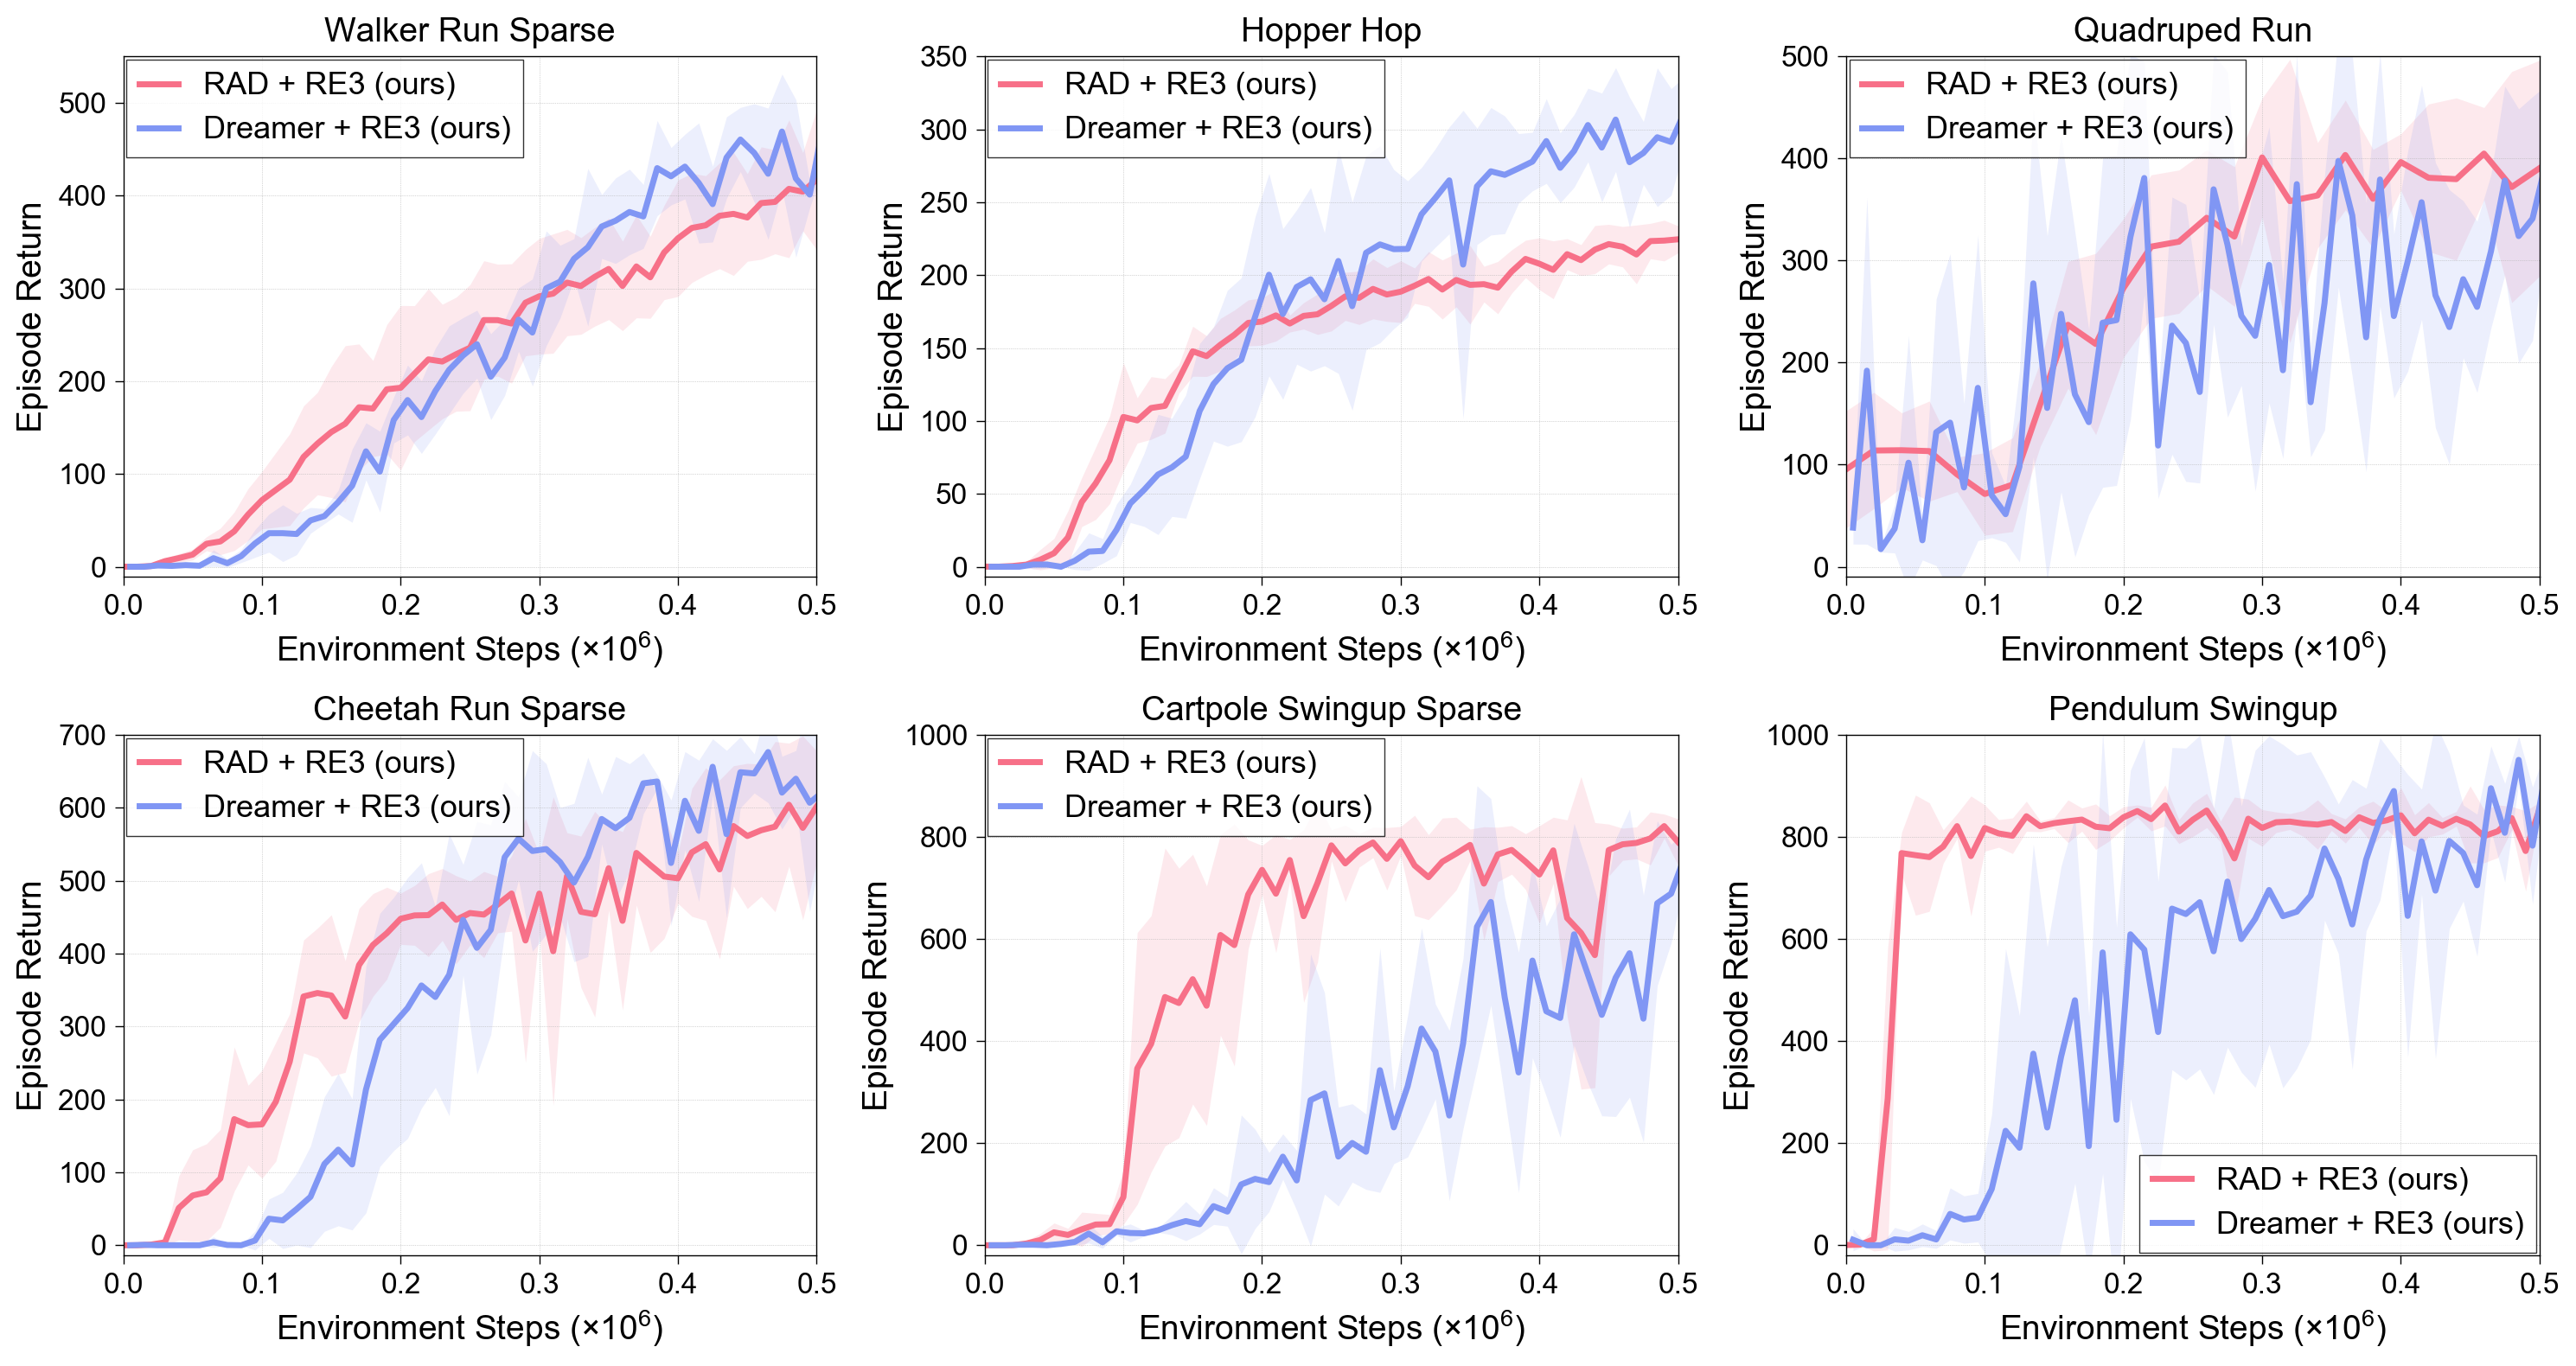

In [5]:
envs = [
    'walker_run_sparse',
    'hopper_hop',
    'quadruped_run',
    'cheetah_run_sparse',
    'cartpole_swingup_sparse',
    'pendulum_swingup'
]

ncol = 3
nrow = (len(envs) + ncol - 1) // ncol

fig, axs = plt.subplots(nrow, ncol, figsize=(5 * ncol, 4 * nrow), dpi=200)
axs = axs.reshape([nrow, ncol])

for idx, env in enumerate(envs):
    row = idx // ncol
    col = idx % ncol
    ax = axs[row, col]
    
    #############
    # RAD + RE3 #
    #############
    env_df = rad_re3_df[rad_re3_df['env'] == env]
    seeds = env_df['seed'].unique()
    
    returns = [env_df[env_df['seed'] == seed]['episode_reward'].to_list() for seed in seeds]
    step = env_df[env_df['seed'] == seeds[0]]['step'] / 10 ** 6
    
    returns_avg = np.mean(returns, axis=0)
    returns_std = np.std(returns, axis=0)
    
    color=(247/255, 112/255, 136/255)
    linewidth=2.5
    
    ax.plot(
        step,
        returns_avg,
        color=color,
        label='RAD + RE3 (ours)',
        linewidth=linewidth
    )
    
    ax.fill_between(
        step,
        returns_avg - returns_std,
        returns_avg + returns_std,
        facecolor=(*color, 0.15),
        edgecolor=(0, 0, 0, 0),
    )
    
    #############
    # Dreamer + RE3 #
    #############
    env_df = dreamer_re3_df[dreamer_re3_df['env'] == env]
    seeds = env_df['seed'].unique()
    
    returns = [env_df[env_df['seed'] == seed]['episode_reward'].to_list() for seed in seeds]
    step = env_df[env_df['seed'] == seeds[0]]['step'] / 10 ** 6
    
    returns_avg = np.mean(returns, axis=0)
    returns_std = np.std(returns, axis=0)
    
    color=(128/255, 150/255, 244/255)
    linewidth=2.5
    
    ax.plot(
        step,
        returns_avg,
        color=color,
        label='Dreamer + RE3 (ours)',
        linewidth=linewidth
    )
    
    ax.fill_between(
        step,
        returns_avg - returns_std,
        returns_avg + returns_std,
        facecolor=(*color, 0.15),
        edgecolor=(0, 0, 0, 0),
    )
    
    ax.set_xlabel('Environment Steps ($\\times 10^6%$)', fontsize=14)
    ax.set_ylabel('Episode Return', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(f'{env_names[env]}', fontsize=14)
    ax.grid(alpha=1.0, linestyle=':', linewidth=0.25)
    ax.set_xlim(0, float(cutoff[env] / 1000))
    leg = ax.legend(fancybox=False, fontsize=13, edgecolor='black', borderaxespad=0.1, handlelength=1.25)
    leg.get_frame().set_linewidth(0.5)
    ax.set_ylim(*ylims[env])

plt.tight_layout()

# Additional Results with 3 Seeds
Plan to update results with 5 seeds

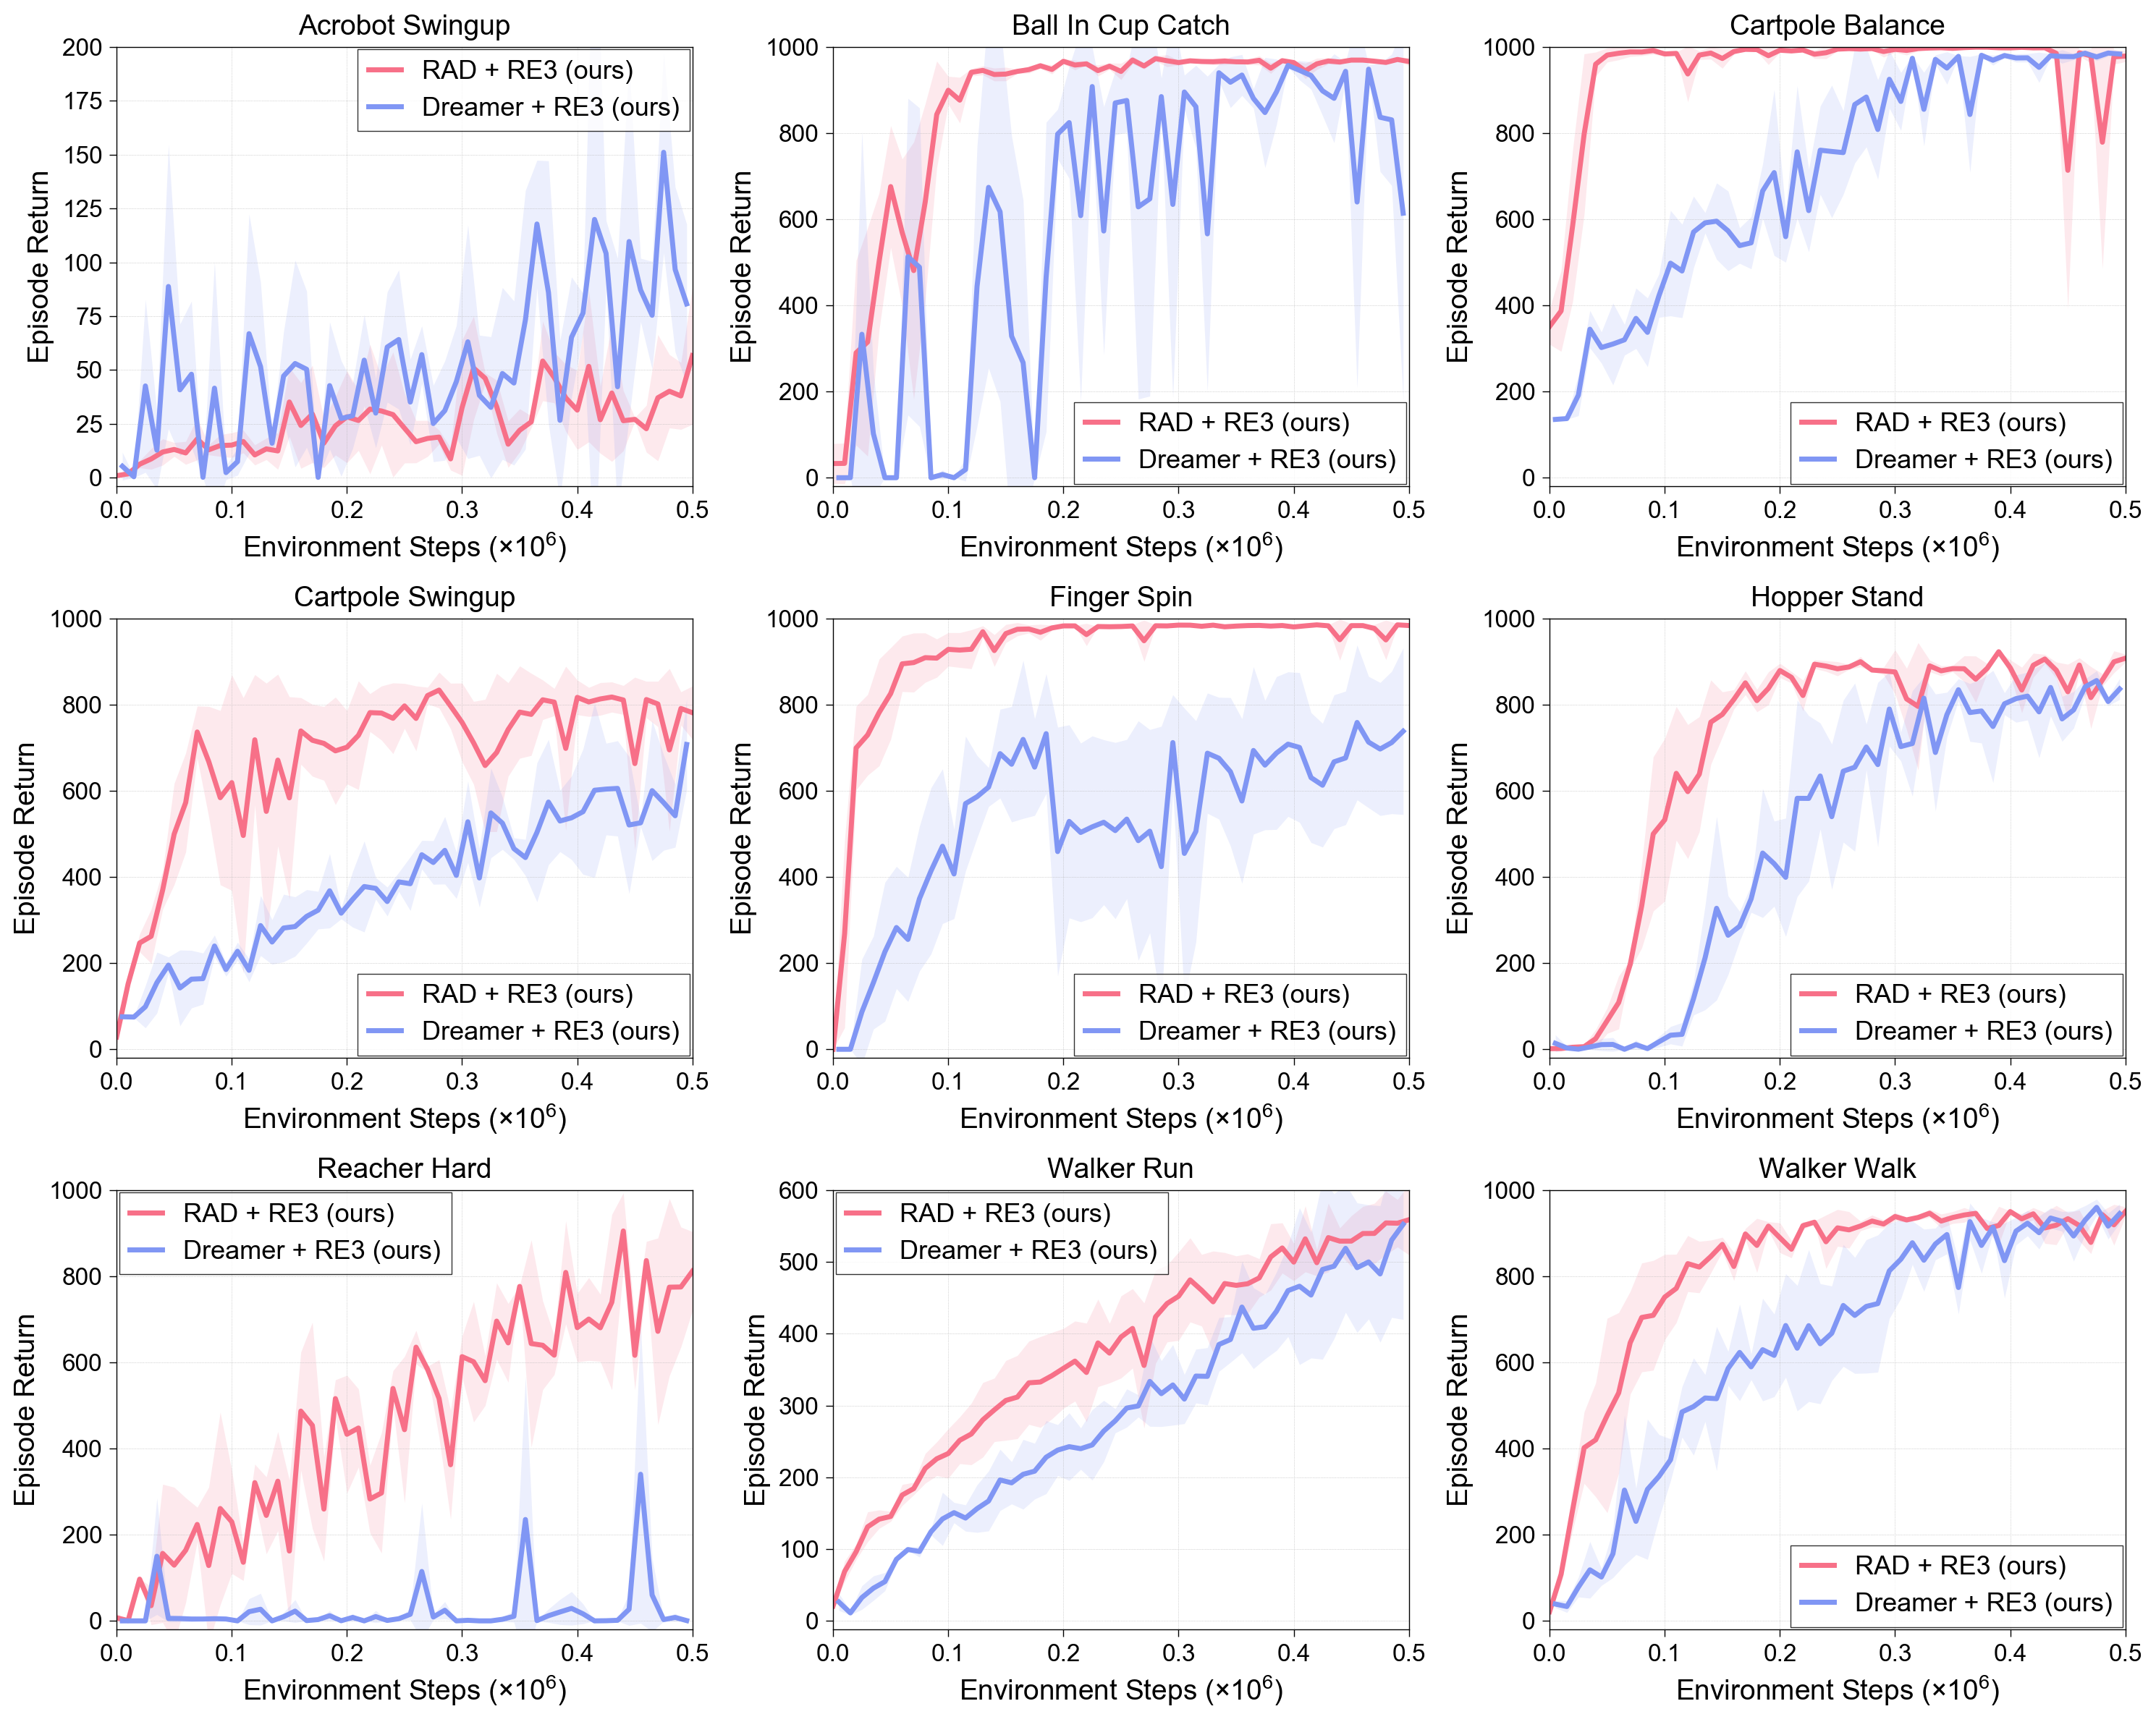

In [6]:
envs = sorted([
    'acrobot_swingup',
    'ball_in_cup_catch',
    'cartpole_balance',
    'cartpole_swingup',
    'finger_spin',
    'hopper_stand',
    'reacher_hard',
    'walker_run',
    'walker_walk'
])

ncol = 3
nrow = (len(envs) + ncol - 1) // ncol

fig, axs = plt.subplots(nrow, ncol, figsize=(5 * ncol, 4 * nrow), dpi=200)
axs = axs.reshape([nrow, ncol])

for idx, env in enumerate(envs):
    row = idx // ncol
    col = idx % ncol
    ax = axs[row, col]
    
    #############
    # RAD + RE3 #
    #############
    env_df = rad_re3_df[rad_re3_df['env'] == env]
    seeds = env_df['seed'].unique()
    
    returns = [env_df[env_df['seed'] == seed]['episode_reward'].to_list() for seed in seeds]
    step = env_df[env_df['seed'] == seeds[0]]['step'] / 10 ** 6
    
    returns_avg = np.mean(returns, axis=0)
    returns_std = np.std(returns, axis=0)
    
    color=(247/255, 112/255, 136/255)
    linewidth=2.5
    
    ax.plot(
        step,
        returns_avg,
        color=color,
        label='RAD + RE3 (ours)',
        linewidth=linewidth
    )
    
    ax.fill_between(
        step,
        returns_avg - returns_std,
        returns_avg + returns_std,
        facecolor=(*color, 0.15),
        edgecolor=(0, 0, 0, 0),
    )
    
    #############
    # Dreamer + RE3 #
    #############
    env_df = dreamer_re3_df[dreamer_re3_df['env'] == env]
    seeds = env_df['seed'].unique()
    
    returns = [env_df[env_df['seed'] == seed]['episode_reward'].to_list() for seed in seeds]
    step = env_df[env_df['seed'] == seeds[0]]['step'] / 10 ** 6
    
    returns_avg = np.mean(returns, axis=0)
    returns_std = np.std(returns, axis=0)
    
    color=(128/255, 150/255, 244/255)
    linewidth=2.5
    
    ax.plot(
        step,
        returns_avg,
        color=color,
        label='Dreamer + RE3 (ours)',
        linewidth=linewidth
    )
    
    ax.fill_between(
        step,
        returns_avg - returns_std,
        returns_avg + returns_std,
        facecolor=(*color, 0.15),
        edgecolor=(0, 0, 0, 0),
    )
    
    ax.set_xlabel('Environment Steps ($\\times 10^6%$)', fontsize=14)
    ax.set_ylabel('Episode Return', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(f'{env_names[env]}', fontsize=14)
    ax.grid(alpha=1.0, linestyle=':', linewidth=0.25)
    ax.set_xlim(0, float(cutoff[env] / 1000))
    leg = ax.legend(fancybox=False, fontsize=13, edgecolor='black', borderaxespad=0.1, handlelength=1.25)
    leg.get_frame().set_linewidth(0.5)
    ax.set_ylim(*ylims[env])

plt.tight_layout()